# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
##mouse_result = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
##mouse_metadata.head()
# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice.
unique_mouse_ids = len(mouse_results["Mouse ID"].unique())

# Display the number of unique Mouse IDs
print(unique_mouse_ids)

249


In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_duplicatese = mouse_results.loc[mouse_results["Mouse ID"] == dup_mice_ID[0]]
mouse_id_duplicatese

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=mouse_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = mouse_results["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice

249

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_data = mouse_results.set_index(["Drug Regimen"])
##group data
group_drug_data = drug_regimen_data.groupby("Drug Regimen")
##to find mean
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
##find median
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
##find var
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
##find standard deviation 
drug_reg_sv = group_drug_data["Tumor Volume (mm3)"].std()
##find sem
drug_reg_SEM = group_drug_data["Tumor Volume (mm3)"].sem()

drug_regimen_summary_df = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                                "Median Tumor Volume": drug_reg_median,
                                "Tumor Volume Variance": drug_reg_var,
                                "Tumor Volume Std.Dev.": drug_reg_sv,
                                "Tumor Volume Std. Err": drug_reg_SEM
                                })

drug_regimen_summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_data = mouse_results.set_index(["Drug Regimen"])

##group by drug reg
group_drug_data = drug_regimen_data.groupby("Drug Regimen")

# Step 3: Use the 'agg()' method to compute multiple summary statistics
drug_regimen_summary_df = group_drug_data["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Step 4: Rename the columns for the summary DataFrame
drug_regimen_summary_df.columns = ["mean", "median", "var", "std", "sem"]

# Step 5: Display the resulting summary DataFrame
drug_regimen_summary_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

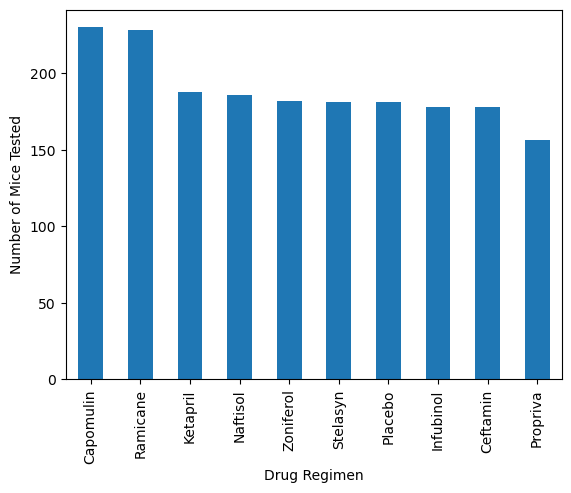

In [28]:
##selecting Drug Regimen and Timepoint
timepoint_and_drugs = clean_total_data[["Drug Regimen","Timepoint"]]



#calculating mice for each unique drug reimen
mice_per_drug = timepoint_and_drugs["Drug Regimen"].value_counts()
mice_per_drug

#Creating bar chart with colour
mice_per_drug.plot(kind="bar",color = '#1f77b4',
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()

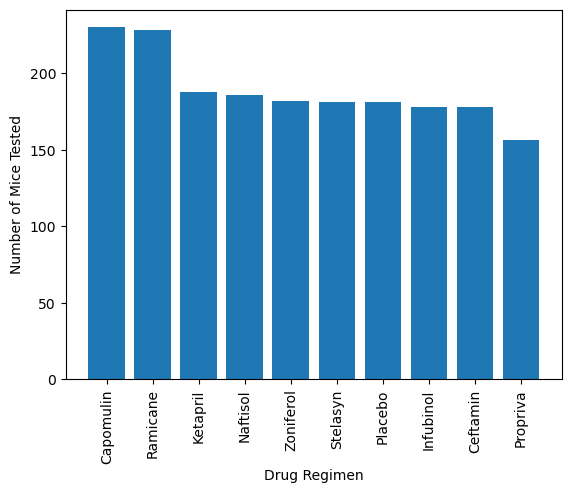

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

#graph
plt.bar(drugs, count, color= '#1f77b4', align = "center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

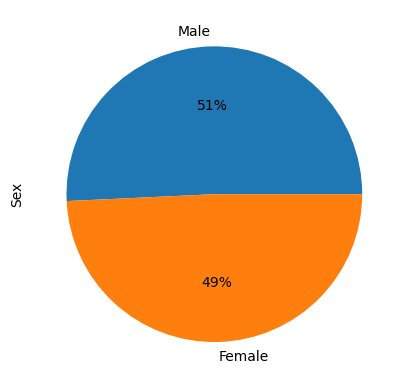

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_total_data["Sex"].value_counts()
Sex =["Male", "Female"]
male_vs_female.plot(kind="pie", ylabel="Sex", autopct="%.0f%%")
plt.show()

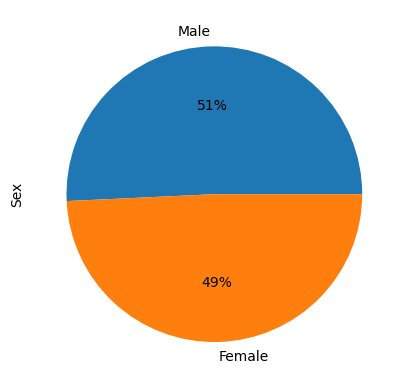

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_vs_female.index.values
count_value = male_vs_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Grouping data by "Mouse ID" to get the maximum "Timepoint" for each mouse
mouse_grouped = mouse_results.groupby("Mouse ID").max()

# Reset the index of the grouped data to turn "Mouse ID" back into a column
resetting_index = mouse_grouped.reset_index()

#Merge the grouped data with the original data based on "Mouse ID" and "Timepoint"
merged_data = resetting_index[['Mouse ID', 'Timepoint']].merge(mouse_results,
                                                                  on=['Mouse ID', 'Timepoint'],
                                                                  how="left")


In [33]:
def get_outliers(drug_regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == drug_regimen]['Tumor Volume (mm3)']
    
    #Calculate quartiles and interquartile range
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    first_quartile = quartiles[0.25]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    
    # Calculate lower and upper bounds for potential outliers
    lower_bound = first_quartile - (1.5 * iqr)
    upper_bound = third_quartile + (1.5 * iqr)
    # Find potential outliers
    
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Print the potential outliers and return the original regimen_data
    print(f"{drug_regimen}'s potential outliers: {outliers}")
    return regimen_data

# Get potential outliers for each drug regimen
capomulin_outliers = get_outliers("Capomulin")
ramicane_outliers = get_outliers("Ramicane")
infubinol_outliers = get_outliers("Infubinol")
ceftamin_outliers = get_outliers("Ceftamin")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


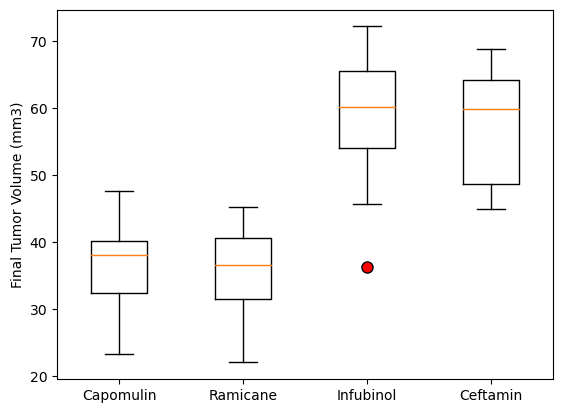

In [34]:
dot = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
# Plot boxplot
plt.boxplot([capomulin_outliers, ramicane_outliers, infubinol_outliers, ceftamin_outliers], labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=dot)
# Add title and labels to boxplot
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

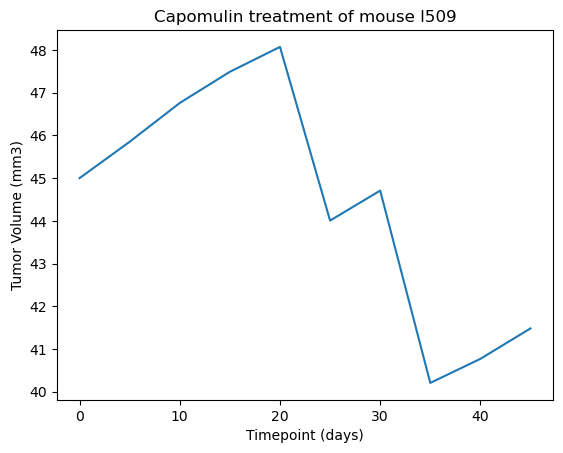

In [35]:
# Filter data for Capomulin regimen and mouse l509
capomulin_df = clean_total_data.loc[
    (clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509")
]

# Select columns
reduced_capomulin_df = capomulin_df[["Timepoint", "Tumor Volume (mm3)"]]

# Graph build and display
plt.plot(reduced_capomulin_df["Timepoint"], reduced_capomulin_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

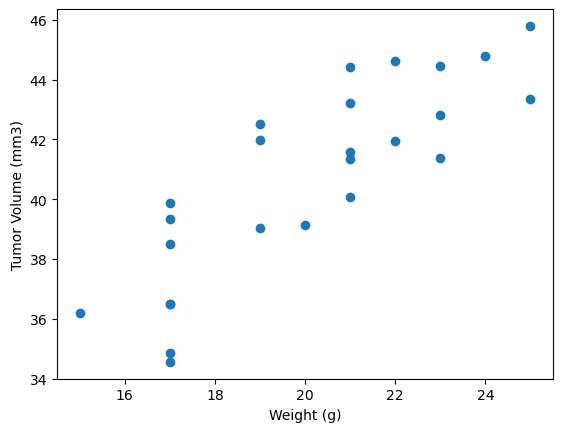

In [36]:
capomulin_df = clean_total_data.loc[clean_total_data["Drug Regimen"] == "Capomulin"]

# Group data by Mouse ID to find average tumor volume for each weight
grouped_capomulin_df = capomulin_df.groupby("Mouse ID")
avg_tumor_vol = grouped_capomulin_df["Tumor Volume (mm3)"].mean()
weight = grouped_capomulin_df["Weight (g)"].mean()

# Create a DataFrame to store the average tumor volume and weight values
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight, "Tumor Volume (mm3)": avg_tumor_vol})

# Plot the scatter plot
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

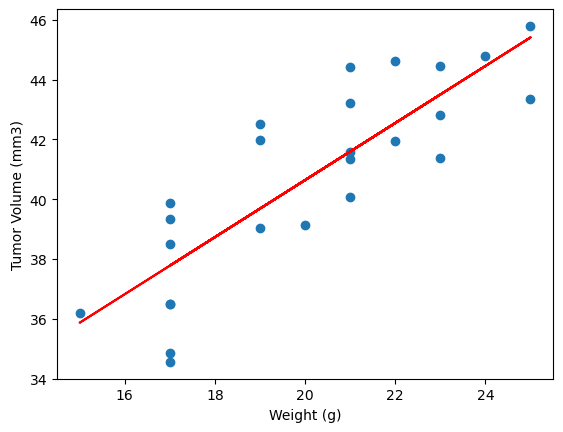

In [47]:
capomulin_df = clean_total_data.loc[clean_total_data["Drug Regimen"] == "Capomulin"]

# Group data by Mouse ID to find average tumor volume for each weight
grouped_capomulin_df = capomulin_df.groupby("Mouse ID")
avg_tumor_vol = grouped_capomulin_df["Tumor Volume (mm3)"].mean()
weight = grouped_capomulin_df["Weight (g)"].mean()

# Calculate the correlation between mouse weight and average tumor volume
correlation= stats.pearsonr(weight, avg_tumor_vol)

# Perform linear regression to get the line equation
slope, intercept = stats.linregress(weight, avg_tumor_vol)[:2]

# Get the x and y values for the scatter plot
x_values = weight
y_values = avg_tumor_vol

# Plot the scatter plot with linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

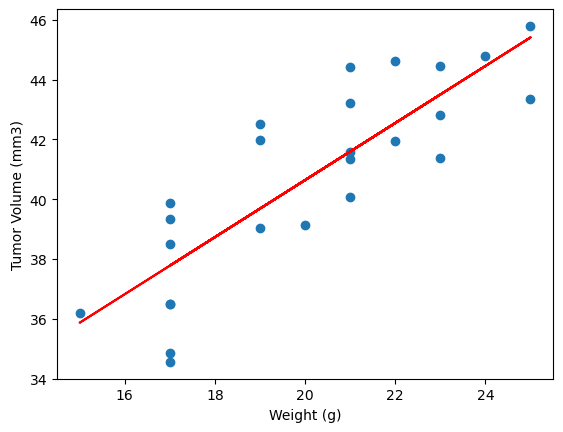

In [44]:
capomulin_df = clean_total_data.loc[clean_total_data["Drug Regimen"] == "Capomulin"]

# Group data by Mouse ID to find average tumor volume for each weight
grouped_capomulin_df = capomulin_df.groupby("Mouse ID")
avg_tumor_vol = grouped_capomulin_df["Tumor Volume (mm3)"].mean()
weight = grouped_capomulin_df["Weight (g)"].mean()

# Calculate the correlation between mouse weight and average tumor volume
correlation, _ = stats.pearsonr(weight, avg_tumor_vol)
##print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

# Perform linear regression to get the line equation
slope, intercept, _, _, _ = stats.linregress(weight, avg_tumor_vol)

# Get the x and y values for the scatter plot
x_values = weight
y_values = avg_tumor_vol

# Plot the scatter plot with linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()